# Classify BC tumors based upon PCA components

## k=3 nearest neighbors

## Import libraries

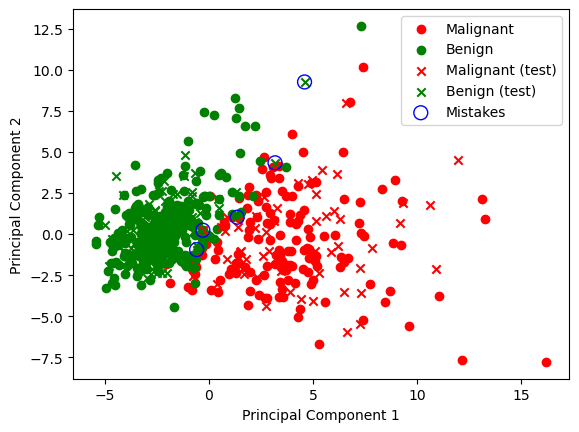

Confusion Matrix:
 [[53  1]
 [ 4 85]]
Accuracy Score: 0.965034965034965
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.99      0.96      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Perform PCA on the standardized data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Train the k=3 nearest neighbor classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)

# Make predictions for the test set
y_pred = knn.predict(X_test_pca)

# Plot the training data
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='r', marker='o', label='Malignant')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='g', marker='o', label='Benign')

# Plot the test data
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color='r', marker='x', label='Malignant (test)')
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color='g', marker='x', label='Benign (test)')

# Plot the mistakes in the test data
plt.scatter(X_test_pca[y_test != y_pred, 0], X_test_pca[y_test != y_pred, 1], color='b', marker='o', facecolors='none', s=100, linewidths=1, label='Mistakes')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print the confusion matrix, accuracy score, and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


---

## Now NB classifier

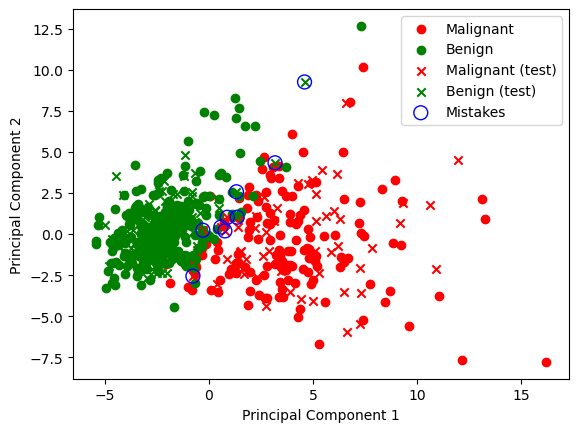

Confusion Matrix:
 [[49  5]
 [ 4 85]]
Accuracy Score: 0.9370629370629371
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.94      0.96      0.95        89

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Perform PCA on the standardized data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)

# Make predictions for the test set
y_pred = gnb.predict(X_test_pca)

# Plot the training data
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], color='r', marker='o', label='Malignant')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], color='g', marker='o', label='Benign')

# Plot the test data
plt.scatter(X_test_pca[y_test == 0, 0], X_test_pca[y_test == 0, 1], color='r', marker='x', label='Malignant (test)')
plt.scatter(X_test_pca[y_test == 1, 0], X_test_pca[y_test == 1, 1], color='g', marker='x', label='Benign (test)')

# Plot the mistakes in the test data
plt.scatter(X_test_pca[y_test != y_pred, 0], X_test_pca[y_test != y_pred, 1], color='b', marker='o', facecolors='none', s=100, linewidths=1, label='Mistakes')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Print the confusion matrix, accuracy score, and classification report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
